# PT Bank BTPN Tbk Stock Prediction using Scikit-Learn Linear Regression

***

## Importing The Libraries

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split
plt.style.use('ggplot')

## Load The Data

In [10]:
# there are 2489 observations and consists of 7 columns
df = pd.read_csv('btpn.csv')
display(df.head(5))
display(df.tail(5))

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-09-16,1848.750000,1875.930054,1848.750000,1848.750000,1725.023071,524139.0
1,2010-09-17,1866.869995,1885.000000,1866.869995,1866.869995,1741.930420,264828.0
2,2010-09-20,1848.750000,1866.869995,1839.680054,1848.750000,1725.023071,358621.0
3,2010-09-21,1839.680054,1857.810059,1839.680054,1839.680054,1716.560059,281380.0
4,2010-09-22,1839.680054,1848.750000,1839.680054,1839.680054,1716.560059,82759.0


,Date,Open,High,Low,Close,Adj Close,Volume
2484,2020-09-08,2290.0,2320.0,2290.0,2310.0,2310.0,42500.0
2485,2020-09-09,2300.0,2310.0,2200.0,2200.0,2200.0,235000.0
2486,2020-09-10,2190.0,2200.0,2050.0,2050.0,2050.0,185100.0
2487,2020-09-11,2000.0,2200.0,1950.0,2180.0,2180.0,145100.0
2488,2020-09-14,2180.0,2360.0,2180.0,2250.0,2250.0,177600.0


## Exploratory Data Analysis

In [11]:
# data types mostly float64, and df used approximately 136.2+ KB of memory
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2489 entries, 0 to 2488
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2489 non-null   object 
 1   Open       2488 non-null   float64
 2   High       2488 non-null   float64
 3   Low        2488 non-null   float64
 4   Close      2488 non-null   float64
 5   Adj Close  2488 non-null   float64
 6   Volume     2488 non-null   float64
dtypes: float64(6), object(1)
memory usage: 136.2+ KB


In [525]:
# generate a set of descriptive statistics based on df
# highest price was 6,050 and lowest price was 1,585
# highest of shares traded was 26,003,700
df.describe(include = 'all')

,Date,Open,High,Low,Close,Adj Close,Volume
count,2489,2488.000000,2488.000000,2488.000000,2488.000000,2488.000000,2.488000e+03
unique,2489,NaN,NaN,NaN,NaN,NaN,NaN
top,2015-11-12,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,3411.019213,3443.710495,3372.161797,3408.814631,3244.168640,4.078913e+05
std,NaN,849.712063,857.038642,840.702411,849.231802,785.697165,1.131109e+06
min,NaN,1605.000000,1700.000000,1585.000000,1605.000000,1605.000000,0.000000e+00
25%,NaN,2640.000000,2660.000000,2610.000000,2640.000000,2491.311279,2.107500e+04
50%,NaN,3400.000000,3450.000000,3335.000000,3400.000000,3289.090576,1.057000e+05
75%,NaN,4000.000000,4030.000000,4000.000000,4000.000000,3810.000000,3.722750e+05


In [12]:
# checking missing values
df.isnull().sum()

Date         0
Open         1
High         1
Low          1
Close        1
Adj Close    1
Volume       1
dtype: int64

<AxesSubplot:>

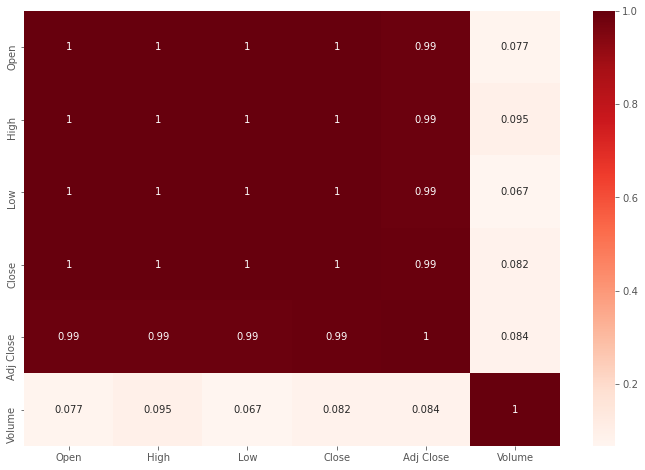

In [13]:
# correlation results between features and label, visualized in heatmap
# open, high, low, and close are highly correlated with adj close, indicated by values of 0.99
plt.figure(figsize = (12,8))
corr = df.corr()
sns.heatmap(corr, annot = True, cmap = plt.cm.Reds)

In [14]:
# remove any missing values
X = df[['Open','High','Low']].dropna()
y = df['Adj Close'].dropna()

<AxesSubplot:>

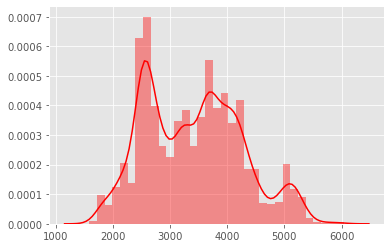

In [15]:
# visualize the features' data distribution plot
# data mildly looks normally distributed
sns.distplot(X, color = 'red')

<AxesSubplot:xlabel='Adj Close'>

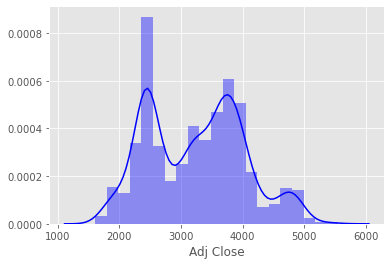

In [16]:
# visualize the labels' data distribution plot
# same with features, labels' data looks quite normally distributed
sns.distplot(y, color = 'blue')

## Splitting Data for Model Training and Testing

In [17]:
# splitting the data by 80:20 for training and testing data
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 0)

## Training and Testing Data with Scikit-Learn Linear Regression

In [18]:
# fitting training data through the model
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [19]:
# R2 Score implies that nearly 98% of features' predict the label
# highest coefficient shown by "High" features which 0.47794771
# if all features' values is zero, the value of label will be around 111.32

print('R2 Score: \n',model.score(x_test,y_test))
print('Coefficient: \n', model.coef_)
print('Intercept: \n', model.intercept_)

R2 Score: 
 0.9857148079421517
Coefficient: 
 [0.15799984 0.47794771 0.28130317]
Intercept: 
 111.32441366301964


## Predicting The Label

In [21]:
# predict the label
prediction = model.predict(x_test)

In [22]:
# create dataframe for actual and prediction values
df_predict = pd.DataFrame({'Actual':y_test,'Predicted':prediction})
df_predict.reset_index(drop = True)

,Actual,Predicted
0,2440.754883,2456.252551
1,2621.941650,2681.132717
2,3774.289795,3816.344192
3,1805.000000,1829.150190
4,3240.000000,3076.977867
...,...,...
493,3662.320801,3720.399573
494,2536.798584,2599.973893
495,3530.000000,3244.559605
496,2589.283936,2656.695143


## Model Evaluation

In [23]:
# the lower MAE values, the better model will be
# better model has MSE values near zero, but value seems large because it's squared version
# smaller RMSE means the model will be better to approximate predicted values in regards of actual values
print('Model Evaluation:')
print('\t')
print('Mean Absolute Error: ', mean_absolute_error(y_test,prediction))
print('Mean Squared Error: ', mean_squared_error(y_test,prediction))
print('Root Mean Squared Error: ', np.sqrt(mean_absolute_error(y_test,prediction)))

Model Evaluation:
	
Mean Absolute Error:  77.05901965680906
Mean Squared Error:  9408.823491820496
Root Mean Squared Error:  8.77832670027774


# Scatterplot of Actual and Predicted Values

Text(0, 0.5, 'Predicted')

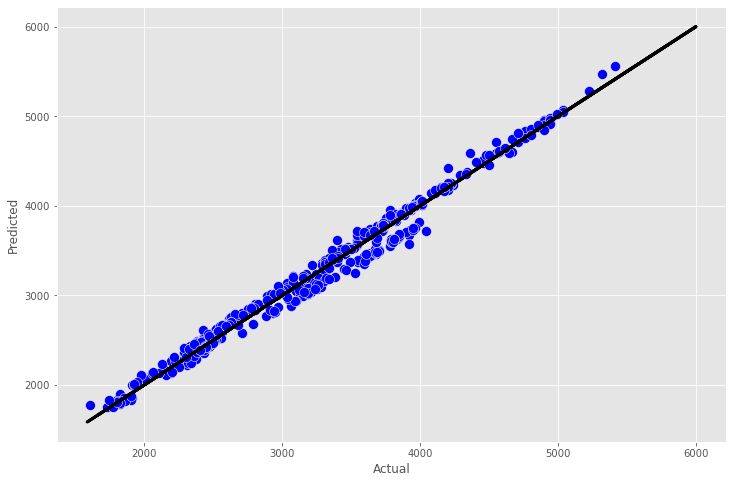

In [24]:
plt.figure(1, figsize = (12,8))
plt.scatter(y_test,prediction, color = 'b', edgecolor = 'w', s = 100)
plt.plot(x_test,x_test,color = 'black', linewidth = 3)
plt.xlabel('Actual')
plt.ylabel('Predicted')